**Tim Based Model AI**
**Supervior** 
 1. Ibu Amalya Citra
 
**Asisten**
 1. Alfianri Manihuruk
 2. Annesa Azizi


In [2]:
#library yang digunakan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skfuzzy as fuzz


In [3]:
#1. fuzzification

def rangesub (low, high, step):
    subjektif = np.arange(low, high, step)
    return subjektif

def Algoritmafuz(rule, range_sub, title):
    lo = fuzz.trimf(range_sub, rule[0])
    hi = fuzz.trimf(range_sub, rule[1])
    
    fig, ax =plt.subplots(nrows=1, figsize=(7,3))
    ax.plot(range_sub, lo, 'g', linewidth = 1.5, label= 'cukup')
    ax.plot(range_sub, hi, 'r', linewidth = 1.5, label= 'baik')
    
    ax.set_title(title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()
    plt.show()
    
    return lo, hi

def Algoritmafuz2(rule, range_sub, title):
    lo = fuzz.trimf(range_sub, rule[0])
    hi = fuzz.trimf(range_sub, rule[1])
   
    fig, ax =plt.subplots(nrows=1, figsize=(6,3))
    ax.plot(range_sub, lo, 'r', linewidth = 1.5, label= 'tolak')
    ax.plot(range_sub, hi, 'b', linewidth = 1.5, label= 'terima')
    
    ax.set_title(title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()
    plt.show()
    
    return lo, hi

In [4]:
# Fungsi Keanggotaan

#1. total nilai keseluruhan
xnilai_total = rangesub(6000, 7099, 1)
rnilai_total = np.array([
    [6000, 6300, 6770.48],
    [6770.48, 6900, 7099]
])

#2. rangking total nilai keseluruhan
xranking = rangesub(1, 170, 1)
rranking = np.array([
    [1, 10, 20],
    [15, 30, 170] 
])


#3. rata-rata nilai keseluruhan
xmean = rangesub(70, 100, 1)
rmean = np.array([
    [70, 84.7, 87.90],
    [87, 92, 100]
])

#4. status berdasarkan pilihan
xstatus = rangesub(0, 1, 0.01)
rstatus = np.array([
    [0, 0.25, 0.5],
    [0.5, 0.75, 1]
])

#5. nilai selisih nilai tiap semester
xselisih = rangesub(1, 4, 0.01)
rselisih = np.array([
    [1, 1.25, 1.88],
    [1.7, 2.58, 4]
])

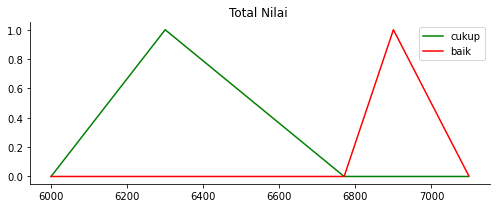

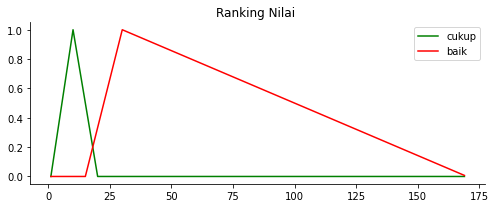

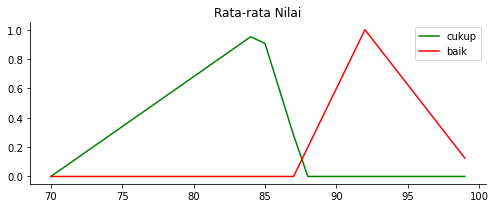

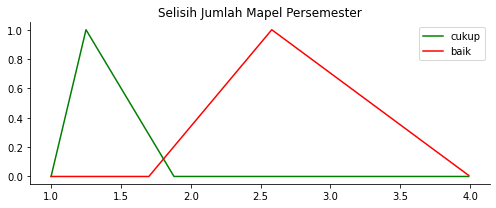

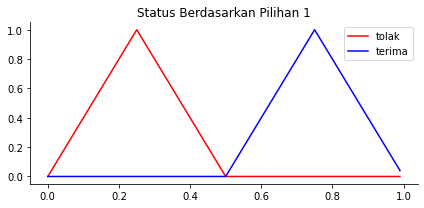

In [5]:
#menampilkan grafik fungsi keanggotaan
lo_nilai, hi_nilai = Algoritmafuz(rnilai_total, xnilai_total, 'Total Nilai ')
lo_ranking, hi_ranking = Algoritmafuz(rranking, xranking, 'Ranking Nilai ')
lo_mean, hi_mean = Algoritmafuz(rmean, xmean, 'Rata-rata Nilai')
lo_selisih, hi_selisih = Algoritmafuz(rselisih, xselisih, 'Selisih Jumlah Mapel Persemester')
lo_status, hi_status = Algoritmafuz2(rstatus, xstatus, 'Status Berdasarkan Pilihan 1')

## Fungsi Keanggotaan

In [7]:
def FungKeanggotaan(range_sub, lo, hi, nilai):
    lo = fuzz.interp_membership(range_sub, lo, nilai)
    hi = fuzz.interp_membership(range_sub, hi, nilai) 
    
    return lo, hi

## Fungsi Status keanggotaan

In [8]:
def Status(keanggotaan):
    status = ""
    if keanggotaan[0] > keanggotaan[1]:
        status = "cukup"
    elif keanggotaan[1] > keanggotaan[0]:
        status = "baik"
    return status

def Status2(keanggotaan):
    status = ""
    if keanggotaan[0] > keanggotaan[1]:
        status = "tolak"
    elif keanggotaan[1] > keanggotaan[0]:
        status = "terima"
  
    return status

### 1. fungsi keanggotan nilai total 

In [9]:
#1. keanggotan nilai total keseluruhan
nil_tot = 6899
nilai_total= FungKeanggotaan(xnilai_total, lo_nilai, hi_nilai, nil_tot)
print("nilai total keselurahan mapel :", nilai_total)

nilai total keselurahan mapel : (0.0, 0.9922791846819025)


### 2. fungsi keanggotan nilai rata-rata

In [10]:
#1. keanggotan nilai rata-rata
nil_mean = 90
nilai_mean = FungKeanggotaan(xmean, lo_mean, hi_mean, nil_mean)
print("nilai rata-rata :", nilai_mean)

nilai rata-rata : (0.0, 0.6)


### 3. fungsi keanggotan nilai ranking

In [11]:
#3. keanggotan ranking nilai
rank_nil = 20
rank_nilai = FungKeanggotaan(xranking, lo_ranking, hi_ranking, rank_nil)
print("ranking nilai : ", rank_nilai)


ranking nilai :  (0.0, 0.3333333333333333)


### 4. fungsi keanggotaan status berdasarkan selisih nilai

In [12]:
# keanggotaan status
nil_selisih = 3
selisih = FungKeanggotaan(xselisih, lo_selisih, hi_selisih, nil_selisih)
print('status selisih : ', selisih)


status selisih :  (0.0, 0.7042253521126761)


### 5. fungsi keanggotaan status berdasarkan pilihan 

In [13]:
# 1. fungsi keanggotaan status
nil_status = 0.9
status = FungKeanggotaan(xstatus, lo_status, hi_status, nil_status)
print(' status pilihan :', status)

 status pilihan : (0.0, 0.3999999999999999)


### Hasil keanggotaan

In [14]:
# nilai keseluruhan mata pelajran
hasil_nilai_total = Status(nilai_total)
hasil_nilai_mean = Status(nilai_mean)
hasil_nilai_rank = Status(rank_nilai)
hasil_nilai_status = Status2(status)
hasil_nilai_sel  = Status(selisih)
print("ranking nilai total siswa        :", hasil_nilai_rank)
print("nilai total mahasiswa            :", hasil_nilai_total)
print("nilai rata-rata mahasiswa        :", hasil_nilai_mean)
print("status siswa berdasarkan pilihan :", hasil_nilai_status)
print("selisih nilai siswa persemester  :", hasil_nilai_sel)


ranking nilai total siswa        : baik
nilai total mahasiswa            : baik
nilai rata-rata mahasiswa        : baik
status siswa berdasarkan pilihan : terima
selisih nilai siswa persemester  : baik


### Fuzzy Rule Base

1. nilai total (cukup, baik)
2. rata-rata (cukup, baik)
3. ranking (baik, cukup)
4. status (tolak,  terima)
5. selisih (cukup, baik)

In [15]:
def rulebase(total, mean, rank, status, selisih):

    siswa = ""
    
    #bagian 1
    if total == 'cukup' and mean == 'cukup' and rank == 'cukup' and selisih == "baik" and status == "tolak" :
        siswa = "siswa di tolak" 
    elif total == 'cukup' and mean == 'cukup' and rank == 'cukup' and selisih == "baik" and status == "terima" :
        siswa = "siswa di tolak" 
    elif total == 'cukup' and mean == 'cukup' and rank == 'cukup' and selisih == "cukup" and status == "terima" :
        siswa = "siswa di tolak"
    elif total == 'cukup' and mean == 'cukup' and rank == 'cukup' and selisih == "cukup" and status == "tolak" :
        siswa = "siswa di tolak"
        
    elif total == 'cukup' and mean == 'cukup' and rank == 'baik' and selisih == "cukup" and status == "tolak" :
        siswa = "siswa di tolak"
    elif total == 'cukup' and mean == 'cukup' and rank == 'baik' and selisih == "cukup" and status == "terima" :
        siswa = "siswa di tolak"
    elif total == 'cukup' and mean == 'cukup' and rank == 'baik' and selisih == "baik" and status == "tolak" :
        siswa = "siswa di tolak"
    elif total == 'cukup' and mean == 'cukup' and rank == 'baik' and selisih == "baik" and status == "terima" :
        siswa = "siswa di pertimbangkan"
        
    elif total == 'cukup' and mean == 'baik' and rank == 'baik' and selisih == "cukup" and status == "tolak" :
        siswa = "siswa di tolak"
    elif total == 'cukup' and mean == 'baik' and rank == 'baik' and selisih == "cukup" and status == "terima" :
        siswa = "siswa di pertimbangkan"
    elif total == 'cukup' and mean == 'baik' and rank == 'baik' and selisih == "baik" and status == "tolak" :
        siswa = "siswa di pertimbangkan"
    elif total == 'cukup' and mean == 'baik' and rank == 'baik' and selisih == "baik" and status == "terima" :
        siswa = "siswa di terima"
        
    elif total == 'cukup' and mean == 'baik' and rank == 'cukup' and selisih == "baik" and status == "tolak" :
        siswa = "siswa di tolak" 
    elif total == 'cukup' and mean == 'baik' and rank == 'cukup' and selisih == "baik" and status == "terima" :
        siswa = "siswa di pertimbangkan" 
    elif total == 'cukup' and mean == 'baik' and rank == 'cukup' and selisih == "cukup" and status == "terima" :
        siswa = "siswa di tolak"
    elif total == 'cukup' and mean == 'baik' and rank == 'cukup' and selisih == "cukup" and status == "tolak" :
        siswa = "siswa di tolak"
        
    #bagian 2
    elif total == 'baik' and mean == 'cukup' and rank == 'cukup' and selisih == "baik" and status == "tolak" :
        siswa = "siswa di tolak" 
    elif total == 'baik' and mean == 'cukup' and rank == 'cukup' and selisih == "baik" and status == "terima" :
        siswa = "siswa di pertimbangkan" 
    elif total == 'baik' and mean == 'cukup' and rank == 'cukup' and selisih == "cukup" and status == "terima" :
        siswa = "siswa di tolak"
    elif total == 'baik' and mean == 'cukup' and rank == 'cukup' and selisih == "cukup" and status == "tolak" :
        siswa = "siswa di tolak"
        
    elif total == 'baik' and mean == 'cukup' and rank == 'baik' and selisih == "cukup" and status == "tolak" :
        siswa = "siswa di tolak"
    elif total == 'baik' and mean == 'cukup' and rank == 'baik' and selisih == "cukup" and status == "terima" :
        siswa = "siswa di tolak"
    elif total == 'baik' and mean == 'cukup' and rank == 'baik' and selisih == "baik" and status == "tolak" :
        siswa = "siswa di pertimbangkan"
    elif total == 'baik' and mean == 'cukup' and rank == 'baik' and selisih == "baik" and status == "terima" :
        siswa = "siswa di terima"
        
    elif total == 'baik' and mean == 'baik' and rank == 'baik' and selisih == "cukup" and status == "tolak" :
        siswa = "siswa di pertimbangkan"
    elif total == 'baik' and mean == 'baik' and rank == 'baik' and selisih == "cukup" and status == "terima" :
        siswa = "siswa di terima"
    elif total == 'baik' and mean == 'baik' and rank == 'baik' and selisih == "baik" and status == "tolak" :
        siswa = "siswa di terima"
    elif total == 'baik' and mean == 'baik' and rank == 'baik' and selisih == "baik" and status == "terima" :
        siswa = "siswa di terima"
        
    elif total == 'baik' and mean == 'baik' and rank == 'cukup' and selisih == "baik" and status == "tolak" :
        siswa = "siswa di pertimbangkan" 
    elif total == 'baik' and mean == 'baik' and rank == 'cukup' and selisih == "baik" and status == "terima" :
        siswa = "siswa di terima" 
    elif total == 'baik' and mean == 'baik' and rank == 'cukup' and selisih == "cukup" and status == "terima" :
        siswa = "siswa di pertimbangkan"
    elif total == 'baik' and mean == 'baik' and rank == 'cukup' and selisih == "cukup" and status == "tolak" :
        siswa = "siswa di tolak"
        
        
    return siswa 
        

# Hasil Akhir

In [16]:
rulebase(hasil_nilai_total, hasil_nilai_mean, hasil_nilai_rank, hasil_nilai_status, hasil_nilai_sel )

'siswa di terima'